<img src="../images/sample-nexrad-moore.png" width=600 alt="ARM Logo"></img>

# Looking at NEXRAD Data from Moore, Oklahoma
---

## Overview
   
Within this notebook, we will cover:

1. How to access NEXRAD data from AWS and test data from MetPy
1. How to read this data into PyART
1. How to customize your plots and maps

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Required | Projections and Features |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Required | Basic plotting |
| [PyART Basics](../foundations/pyart-basics) | Required | IO/Visualization |

- **Time to learn**: 45 minutes
---

## Imports

In [93]:
import pyart
from metpy.cbook import get_test_data
from metpy.plots import USCOUNTIES
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")

## How to Access NEXRAD Data from MetPy and AWS
Let's start first with accessing data from the MetPy cookbook module!

### MetPy's Cookbook Datasets
Similar to Pythia datasets, MetPy has a suite of data that can be used within examples and tests! We use the `metpy.cbook.get_test_data()` function to access the data.

Note - there are only a few files here. This is meant to be small subset, not a full archive.

In [7]:
get_test_data?

Signature: get_test_data(fname, as_file_obj=True, mode='rb')
Docstring: Access a file from MetPy's collection of test data.
File:      ~/opt/anaconda3/envs/radar-cookbook-dev/lib/python3.9/site-packages/metpy/cbook.py
Type:      function


### Level 2 Data
Level 2 data includes all of the fields in a single file - for example, a file may include:
- Reflectivity
- Velocity

In [25]:
level2_file = get_test_data('KTLX20130520_201643_V06.gz', as_file_obj=False)

### Check to see where the data is at
Let's see where it downloaded data to - you'll see it placed the data in the the MetPy cache directory!

In [8]:
level2_file

'/Users/mgrover/Library/Caches/metpy/v1.3.0/KTLX20130520_201643_V06.gz'

## Read the Data into PyART

When reading into PyART, we can use the `pyart.io.read_nexrad_archive`/`pyart.io.read_level3` module, or, we can use the `pyart.io.read` module which automatically detects the filetype being read in.

In [65]:
radar = pyart.io.read(level2_file)

Notice how for the **NEXRAD Level 2** data, we have several fields available

In [66]:
list(radar.fields)

['differential_phase',
 'reflectivity',
 'velocity',
 'differential_reflectivity',
 'cross_correlation_ratio',
 'spectrum_width']

### Plot a quick-look of the dataset
Let's get a quicklook of the reflectivity and velocity fields

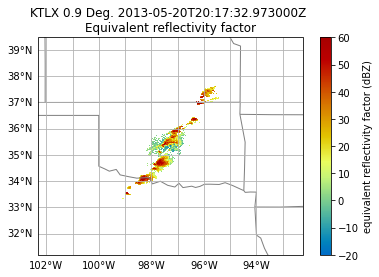

In [88]:
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     projection=ccrs.PlateCarree()
                    )

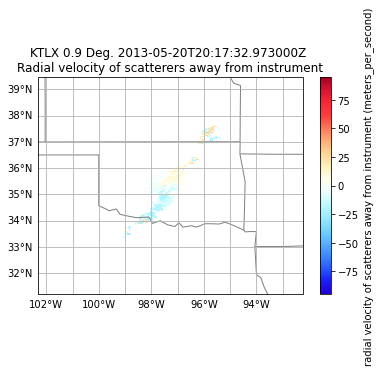

In [89]:
display.plot_ppi_map('velocity',
                     sweep=3,
                     projection=ccrs.PlateCarree(),
                    )

## How to customize your plots and maps
Let's add some more features to our map, and zoom in on our main storm

### Combine into a single figure
Let's start first by combining into a single figure, and zooming in a bit on our main domain.

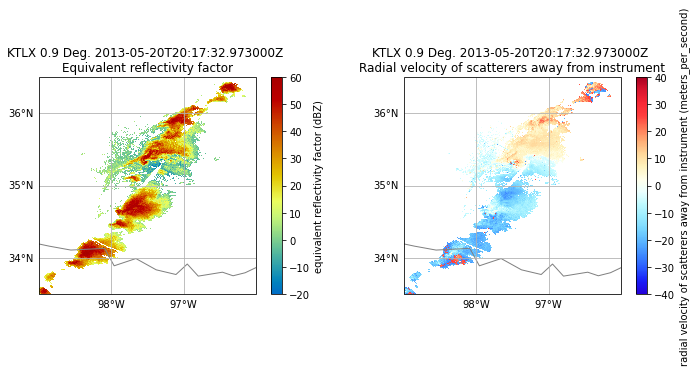

In [92]:
# Create our figure
fig = plt.figure(figsize=[12, 4])

# Setup our first axis with reflectivity
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     ax=ax1,)

# Zoom in by setting the xlim/ylim
plt.xlim(-99, -96)
plt.ylim(33.5, 36.5)

# Setup our second axis for velocity
ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
display.plot_ppi_map('velocity',
                     sweep=3,
                     vmin=-40,
                     vmax=40,
                     projection=ccrs.PlateCarree(),
                     ax=ax2,)

# Zoom in by setting the xlim/ylim
plt.xlim(-99, -96)
plt.ylim(33.5, 36.5)
plt.show()

### Add Counties
We can add counties onto our map by using the `USCOUNTIES` module from `metpy.plots`

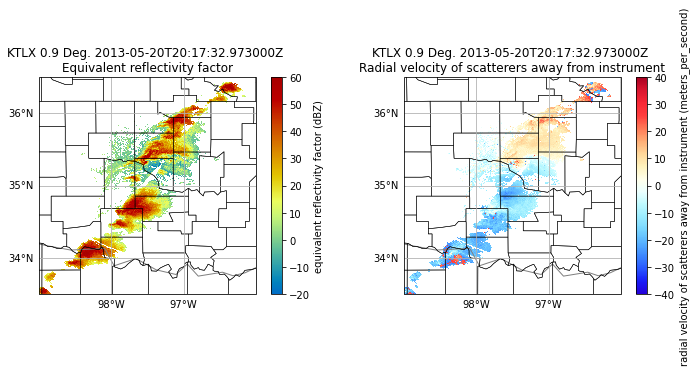

In [98]:
# Create our figure
fig = plt.figure(figsize=[12, 4])

# Setup our first axis with reflectivity
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     ax=ax1,)

# Zoom in by setting the xlim/ylim
plt.xlim(-99, -96)
plt.ylim(33.5, 36.5)

# Add counties
ax1.add_feature(USCOUNTIES,
                linewidth=0.5)

# Setup our second axis for velocity
ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
display.plot_ppi_map('velocity',
                     sweep=3,
                     vmin=-40,
                     vmax=40,
                     projection=ccrs.PlateCarree(),
                     ax=ax2,)

# Zoom in by setting the xlim/ylim
plt.xlim(-99, -96)
plt.ylim(33.5, 36.5)

# Add counties
ax2.add_feature(USCOUNTIES,
                linewidth=0.5)

plt.show()

### Zoom in even more
Let's zoom in even more to our main feature - it looks like there is velocity couplet (where high positive and negative values of velcocity are close to one another, indicating rotation), near the center of our map.

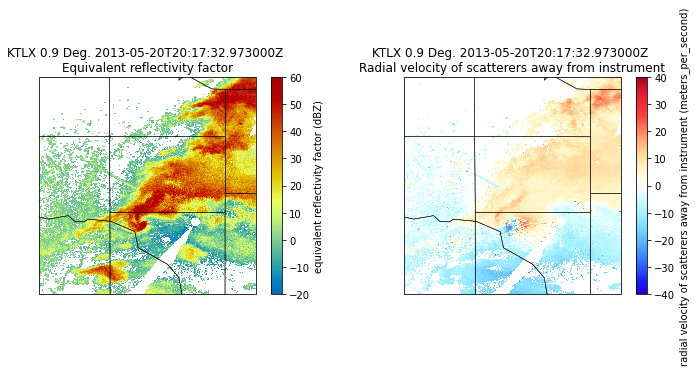

In [100]:
# Create our figure
fig = plt.figure(figsize=[12, 4])

# Setup our first axis with reflectivity
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     ax=ax1,)

# Zoom in by setting the xlim/ylim
plt.xlim(-98, -97)
plt.ylim(35, 36)

# Add counties
ax1.add_feature(USCOUNTIES,
                linewidth=0.5)

# Setup our second axis for velocity
ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
display.plot_ppi_map('velocity',
                     sweep=3,
                     vmin=-40,
                     vmax=40,
                     projection=ccrs.PlateCarree(),
                     ax=ax2,)

# Zoom in by setting the xlim/ylim
plt.xlim(-98, -97)
plt.ylim(35, 36)

# Add counties
ax2.add_feature(USCOUNTIES,
                linewidth=0.5)

plt.show()

### Customize our Labels and Add Finer Grid Labels
You'll notice, by default, our colorbar label for the velocity field on the right extends across our entire figure, and the latitude/longitude labels on our axes are now gone. Let's fix that!

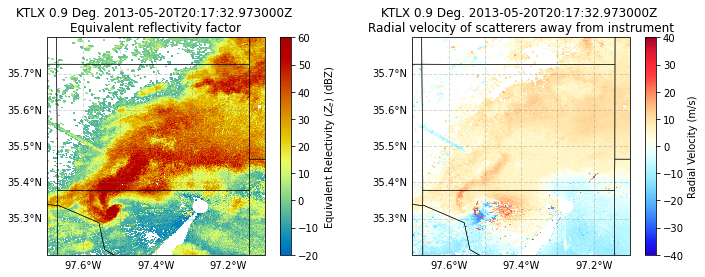

In [118]:
# Create our figure
fig = plt.figure(figsize=[12, 4])

# Setup our first axis with reflectivity
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
ref_map = display.plot_ppi_map('reflectivity',
                               sweep=3,
                               vmin=-20,
                               vmax=60,
                               ax=ax1,
                               colorbar_label='Equivalent Relectivity ($Z_{e}$) (dBZ)')


# Zoom in by setting the xlim/ylim
plt.xlim(-97.7, -97.1)
plt.ylim(35.2, 35.8)

# Add gridlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1, 
                  color='gray', 
                  alpha=0.3,
                  linestyle='--')

# Make sure labels are only plotted on the left and bottom
gl.xlabels_top = False
gl.ylabels_right = False

# Increase the fontsize of our gridline labels
gl.xlabel_style = {'fontsize':10}
gl.ylabel_style = {'fontsize':10}

# Add counties
ax1.add_feature(USCOUNTIES,
                linewidth=0.5)

# Setup our second axis for velocity
ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
vel_plot = display.plot_ppi_map('velocity',
                                sweep=3,
                                vmin=-40,
                                vmax=40,
                                projection=ccrs.PlateCarree(),
                                ax=ax2,
                                colorbar_label='Radial Velocity (m/s)')

# Zoom in by setting the xlim/ylim
plt.xlim(-97.7, -97.1)
plt.ylim(35.2, 35.8)

# Add gridlines
gl = ax2.gridlines(crs=ccrs.PlateCarree(),
                   draw_labels=True,
                   linewidth=1, 
                   color='gray', 
                   alpha=0.3,
                   linestyle='--')

# Make sure labels are only plotted on the left and bottom
gl.xlabels_top = False
gl.ylabels_right = False

# Increase the fontsize of our gridline labels
gl.xlabel_style = {'fontsize':10}
gl.ylabel_style = {'fontsize':10}

# Add counties
ax2.add_feature(USCOUNTIES,
                linewidth=0.5)

plt.show()

---
## Summary
Within this example, we walked through how to use MetPy and PyART to read in sample NEXRAD Level 2 data from the Moore Oklahoma tornado in 2013, create some quick looks, and customize the plots to analyze the tornadic supercell closest to the radar.

### What's next?
Other examples will look at additional data sources and radar types, including data from the Department of Energy (DOE) Atmospheric Radiation Measurement (ARM) Facility, and work through more advanced workflows such as completing a dual-Doppler analysis.

## Resources and References
* [MetPy Documentation](https://unidata.github.io/MetPy/latest/index.html)
* [NEXRAD Data on AWS](https://registry.opendata.aws/noaa-nexrad/)